In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

        


In [2]:
def plot_symmetry(pvec):
    
    n=1000
    l=len(pvec)
    pvec = np.array(sorted(pvec))
    seats = []
    votes = []
    small = pvec[0]
    large = pvec[-1]
    
    gap = large - small
    
    
    
    mean = np.mean(pvec)
    
    lvec = pvec - mean*np.ones([1,l])
    
    
    
    for t in range(n):
        tvec = lvec + (t/n)*np.ones([1,l])
        votes.append(np.mean(tvec))
        seats.append(sum(sum(tvec>=.5))/l)
        
    
    bn = np.array([mean+ (.5-x) for x in pvec])
    
    
    cn=[str(round(float(bn), 3)) for bn in bn]
    bvotes=[]
    bseats=[]
    
    for t in range(n):
        bvotes.append(t/n)
        bseats.append(sum(bn<(t/n))/l)
        
    
    bn = np.array([mean+ (.5-x) for x in pvec])
    
    bvotes=[]
    bseats=[]
    
    for t in range(n):
        bvotes.append(t/n)
        bseats.append(sum(bn<(t/n))/l)
        
    dn=list(bn[:])
    for x in bn:
        dn.append(1-x)
        
    rseats=list(reversed(seats))

            
    en=[str(round(float(dn), 3)) for dn in dn]
    area=0
    for t in range(n):
        area += (1/n)*abs(seats[t]-(1-rseats[t])) 



    plt.figure(figsize=(18,6) )   
    plt.plot(bvotes,bseats,linewidth = 5)

    plt.plot([.5],[.5],'ro', markersize=10)
    plt.plot([mean],[sum(pvec>=.5)/l],'g*', markersize=20)

    plt.xlabel("Vote %")
    plt.ylabel("Seat %")
    plt.xticks(bn,cn, rotation=45)
    ys=[x/l for x in range(l+1)]
    zs=[str(round(float(ys), 3)) for ys in ys]
    plt.yticks(ys,zs)

    plt.title("Seats -- Votes")

    plt.show()


    fig, ax = plt.subplots(1,figsize=(18,6))    

    rseats=list(reversed(seats))


    errorboxes = []
    for t in range(n):
        rect = Rectangle((t/n, min(seats[t],1-rseats[t])), 1/n,abs(seats[t]-(1-rseats[t])))
        errorboxes.append(rect)


    pc = PatchCollection(errorboxes, facecolor='gray', edgecolor=None)

    ax.add_collection(pc)
    plt.plot([.5],[.5],'ro', markersize=10)
    plt.plot(votes,seats,'b',label='Original')


    plt.plot(votes,[1-x for x in rseats],'y',label="Flipped")



    plt.legend()    
    plt.xlabel("Vote %")
    plt.ylabel("Seat %")



    plt.xticks(dn,en, rotation=45)
    ys=[x/l for x in range(l+1)]
    zs=[str(round(float(ys), 3)) for ys in ys]
    plt.yticks(ys,zs)
    plt.title("Seats -- Votes: Symmetry Gaps")

    


In [3]:
def partisan_metrics(pvec):
    #Based on Parker's GerryChain Function
    l=len(pvec)
    
    pvec = np.array(sorted(pvec))
    
    mean = np.mean(pvec)
        
    jumps = [mean - p +.5 for p in sorted(pvec,reverse=True)]
    
    reverse_jumps = reversed([1-s for s in jumps])
    
    rectangle_area = (1/len(pvec)) * sum(abs(s - r) for s, r in zip(jumps, reverse_jumps))
    
    print("Partisan Gini", rectangle_area)
    print("Mean-Median", np.median(pvec)-mean)
    print("Efficiency Gap", 2*mean - sum(pvec>=.5)/len(pvec) - .5)

    print("Jumps", jumps)
    print("Reverse Jumps", [1-x for x in jumps])
    
    return jumps


Partisan Gini 0.04444444444444443
Mean-Median 0.033333333333333326
Efficiency Gap -0.033333333333333326
Jumps [0.3666666666666667, 0.4666666666666667, 0.6666666666666666]
Reverse Jumps [0.6333333333333333, 0.5333333333333333, 0.33333333333333337]


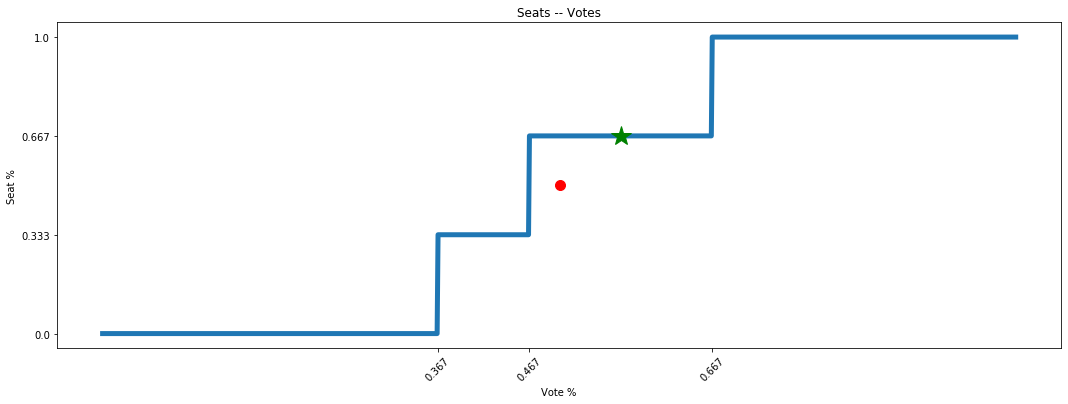

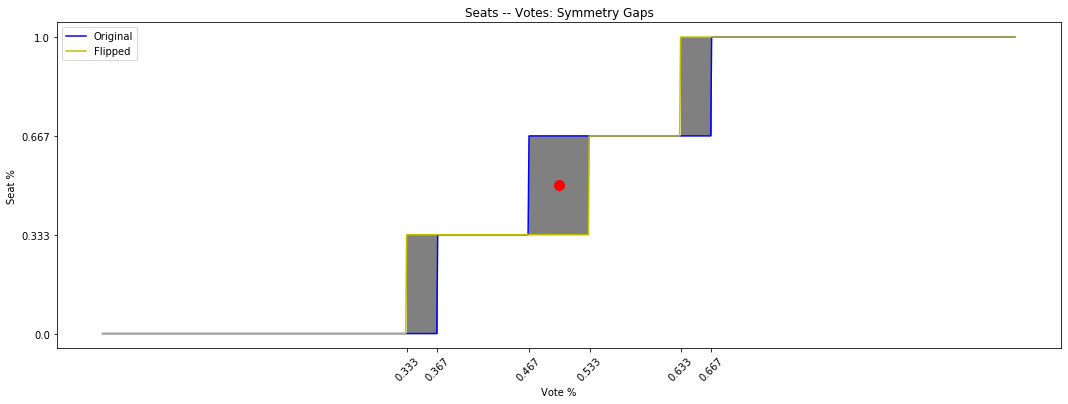

In [4]:
partisan_metrics([.4,.6,.7])
plot_symmetry([.4,.6,.7])

In [38]:
#partisan_metrics([.487,.79,.934,.635,.652,.589,.535,.546,.403,.487,.41,.34,.705,.421,.322,.473,.563])
#plot_symmetry([.487,.79,.934,.635,.652,.589,.535,.546,.403,.487,.41,.34,.705,.421,.322,.473,.563])
partisan_metrics([.4, .41, .9, 1])

Partisan Gini 0.04500000000000004
Mean-Median -0.022499999999999964
Efficiency Gap 0.355
Jumps [0.1775, 0.27749999999999997, 0.7675000000000001, 0.7775]
Reverse Jumps [0.8225, 0.7225, 0.23249999999999993, 0.22250000000000003]


[0.1775, 0.27749999999999997, 0.7675000000000001, 0.7775]

for k even:

In [61]:
k = 6

# a is initial vote share in first district
# delta[0], delta[k] is always 0
a = 0
deltas = [0, .05, .55, .2, 1, .1, 0]
vote_shares = [0] * k

for i in range(k):
    vote_shares[i] = a + sum(deltas[:i+1])

print("vote shares vector:", vote_shares, "\n")

#vote_shares = [0] * 6
#for i in range(k)
 #   vote_shares[i] = a + deltas[:i]

result = 0

for i in range(k//2):
    x = 0
    for l in range(i+1):
        x += l * (deltas[k-l] - deltas[l])
    for j in range(i+1, k - i):
        x += (k//2 - j) * deltas[j]
    result += abs(x)

result = result * (4 / k**2)
print('PG is', result, '\n')


partisan_metrics(vote_shares)

vote shares vector: [0, 0.05, 0.6000000000000001, 0.8, 1.8, 1.9000000000000001] 

PG is 0.21111111111111108 

Partisan Gini 0.21111111111111108
Mean-Median -0.15833333333333333
Efficiency Gap 0.5500000000000003
Jumps [-0.5416666666666667, -0.44166666666666665, 0.5583333333333333, 0.7583333333333333, 1.3083333333333333, 1.3583333333333334]
Reverse Jumps [1.5416666666666667, 1.4416666666666667, 0.44166666666666665, 0.2416666666666667, -0.30833333333333335, -0.3583333333333334]


[-0.5416666666666667,
 -0.44166666666666665,
 0.5583333333333333,
 0.7583333333333333,
 1.3083333333333333,
 1.3583333333333334]